

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#008000;overflow:hidden;font-weight:600">World Cup- Exploratory Data Analysis</div>

![](https://phantom-marca.unidadeditorial.es/f423e112c89abff5e275958da9d479f4/resize/1320/f/jpg/assets/multimedia/imagenes/2022/06/15/16553118744988.jpg)

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#008000;overflow:hidden;font-weight:400">Introduction</div>

## World Cup, formally FIFA World Cup, in football (soccer), quadrennial tournament of men's national teams that determines the sport's world champion. It is likely the most popular sporting event in the world, drawing billions of television viewers every tournament.

### Import useful libraries

In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./data2'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./data2\WorldCupMatches.csv
./data2\WorldCupPlayers.csv
./data2\WorldCups.csv


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#008000;overflow:hidden;font-weight:400">Exploratory Data Analysis</div>

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#008000;overflow:hidden;font-weight:100">1. Preprocessing</div>

In [22]:
#Looking at the DF

hist_worldcup= pd.read_csv('./data2/WorldCups.csv')
hist_worldcup

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


In [23]:
hist_worldcup['Attendance'].dtypes #Some problem  with this column. As you can see dtype= object.

#There is a problem with this column , that's why the preprocessing
hist_worldcup['Attendance']= hist_worldcup["Attendance"].str.replace('.', '').astype(int)


#Add the last worldcup row that wasn't in the csv, the last world cup
list2018= [2018,'Russia','France','Croatia','Belgium','England',169,32,64,"3031768"]
hist_worldcup.loc[len(hist_worldcup)] = list2018

#Add a column with data about the winner's continent

hist_worldcup['Winner_continent']= ['America','Europe','Europe','America','Europe','America','America','Europe','America','Europe',
                                   'America','Europe','America','Europe','America','Europe','America','Europe','Europe','Europe','Europe']

#'Rename some columns'

hist_worldcup= hist_worldcup.rename(columns={'Country':'Country_host','Runners-Up':'Second'})


#Add a column with data about the continent where the World Cup was played
hist_worldcup['Continent_host']= ['America','Europe','Europe','America','Europe','Europe','America','Europe', 'America','Europe',
                                 'America','Europe','America','Europe','America','Europe','Asia','Europe','Africa','America','Europe']


#Add a column to inform if the host win the world cup or not
hist_worldcup['Host_winner']= hist_worldcup['Country_host']== hist_worldcup['Winner']



#Add a column to inform if the host is in the best4
hist_worldcup['Host_best4'] = hist_worldcup[['Winner','Second','Third','Fourth']].eq(hist_worldcup['Country_host'],axis=0).any(1)



#Turn the Germany FR to Germany
hist_worldcup = hist_worldcup.replace(['Germany FR'],'Germany')


<ipython-input-23-d9c74e9cb8bf>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  hist_worldcup['Attendance']= hist_worldcup["Attendance"].str.replace('.', '').astype(int)


In [24]:
#Looking at how it looks like the DF
hist_worldcup.head()

,Year,Country_host,Winner,Second,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,Winner_continent,Continent_host,Host_winner,Host_best4
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549,America,America,True,True
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000,Europe,Europe,True,True
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700,Europe,Europe,False,False
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246,America,America,False,True
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607,Europe,Europe,False,False


## Columns

<li> Year </li>
<li>  Country_host = where the world cup was played </li>
<li>  Winner = World cup Championship </li>
<li> Second </li>
<li> Third </li>
<li>  Fourth </li>
<li>  GoalsScored </li>
<li> QualifiedTeams = Number of competitors </li>
<li> MatchesPlayed </li>
<li> Attendance = Total of spectators </li>
<li> Winner_continent = champion's continent </li>
<li> Continent_host = host's continent </li> 
<li> Host_winner = if the host wins the world cup, True = Yes, False = Not </li>
<li> Host_best4 = if the host is in the best 4   True = Yes, False = Not </li>

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#008000;overflow:hidden;font-weight:100">2. Data Visualization</div>

<h3>Total Spectators</h3>

In [25]:
#There is a problem with this column , that's why the preprocessing
#hist_worldcup['Attendance']= hist_worldcup["Attendance"].str.replace('.', '').astype(int)
#hist_worldcup['Attendance']

TypeError: unhashable type: 'list'

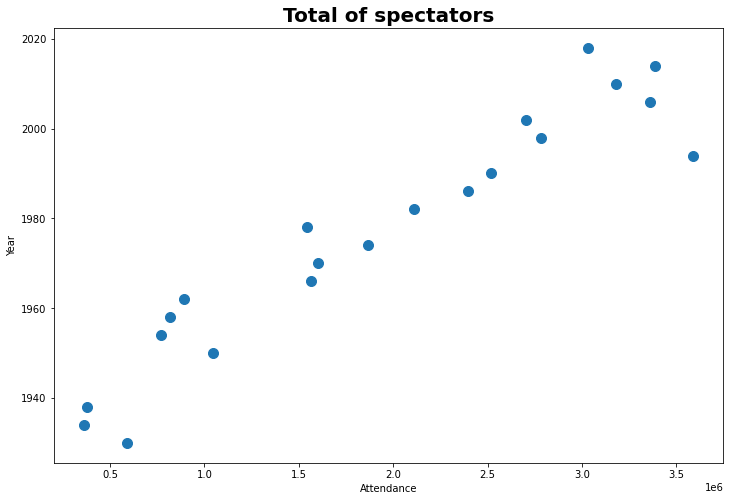

In [26]:
fig, ax= plt.subplots(figsize=(12,8))
plt.title('Total of spectators',size=20,weight='bold')
hist_worldcup.plot.scatter(x='Attendance',y='Year',ax=ax,zorder=2,s=100)
ax.spines[['right', 'top', 'left','bottom']].set_visible(False)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.grid(visible=True)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_yticks(hist_worldcup['Year'].tolist())
ax.set_xticks([500000,1000000,1500000,2000000,2500000,3000000,3500000,4000000])
ax.ticklabel_format(style='plain')

plt.tick_params(bottom=False, left=False)

* As we can see the amount of spectators has grown up through the years. The world cup turned to be the most important sport event in the world. Although I have to say that in the last world cups, there was

* An important thing to say is that between 1938 and 1950 there was no World Cup because of **the Second World War**.

### **Number of countries in the World Cup through years**

TypeError: unhashable type: 'list'

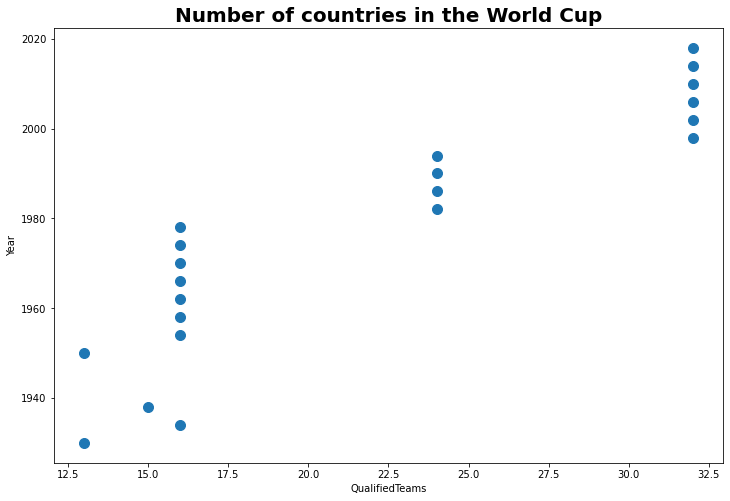

In [27]:
fig, ax= plt.subplots(figsize=(12,8))
plt.title('Number of countries in the World Cup',size=20,weight='bold')
hist_worldcup.plot.scatter(x='QualifiedTeams',y='Year',ax=ax,zorder=2,s=100)
ax.spines[['right', 'top', 'left','bottom']].set_visible(False)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.grid(visible=True)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_yticks(hist_worldcup['Year'].tolist())
ax.set_xticks([0,16,24 ,32,48])
plt.tick_params(bottom=False, left=False)

<h3> From the beggining, the World Cup has been incresing cup after cup. It has started with 13 countries and now there are 32.</h3>

### **World Cup goals scored per year**

TypeError: unhashable type: 'list'

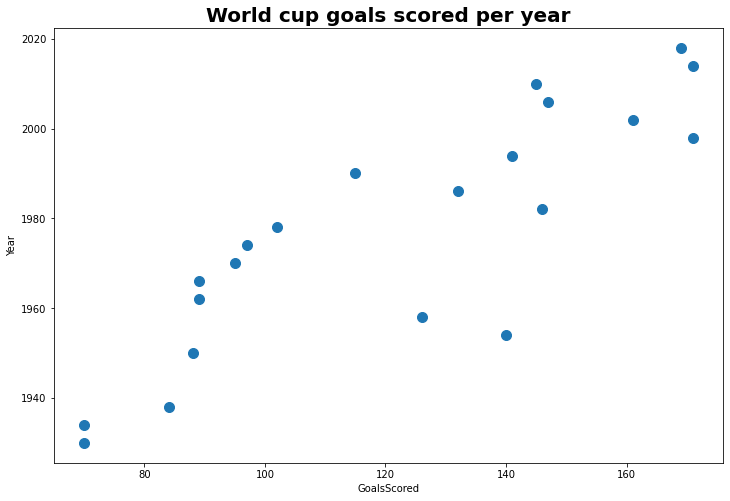

In [28]:
fig, ax= plt.subplots(figsize=(12,8))
plt.title('World cup goals scored per year',size=20,weight='bold')
hist_worldcup.plot.scatter(x='GoalsScored',y='Year',ax=ax,zorder=2,s=100)
ax.spines[['right', 'top', 'left','bottom']].set_visible(False)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.grid(visible=True)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_yticks(hist_worldcup['Year'].tolist())
ax.set_xticks([50,75,100,125,150,175,200])
plt.tick_params(bottom=False, left=False)

<h3> The amount of countries and, as we can see in the DF, the amount of matches played turned the World Cup to have more goals scored.</h3>

## **World Cup Champions**

TypeError: unhashable type: 'list'

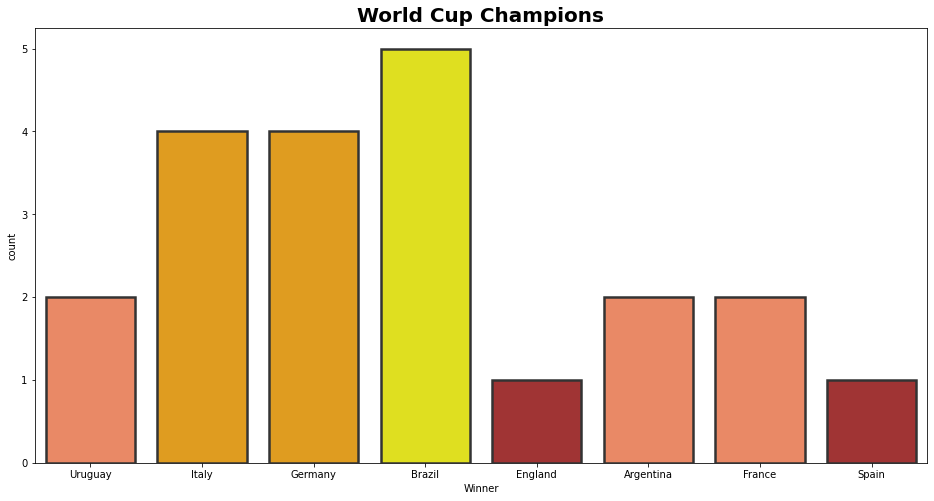

In [29]:
palette=['coral','orange','orange','yellow','firebrick','coral','coral','firebrick']
fig, ax= plt.subplots(figsize=(16,8))

plt.title('World Cup Champions',size=20,weight='bold')
sns.countplot(x = hist_worldcup['Winner'], palette=palette,linewidth=2.5, edgecolor=".2")
ax.spines[['right', 'top', 'left','bottom']].set_visible(False)
ax.set_ylabel(None)
ax.set_xlabel(None)
plt.tick_params(labelleft=False, left=False,labelsize=14)

for i in ax.containers:
    ax.bar_label(i,fontsize=15);

 ###  Brazil has won the World Cup more times than any other country in the world.

![](https://web-test.conmebol.com/wp-content/uploads/2020/06/ebviac5xqaivupq.jpeg)


### **Which continent has got the most amount of World Cups?**

In [30]:
index1 = hist_worldcup['Winner_continent'].value_counts().index.tolist() #preprocessing for plotting a pie chart
value1 = hist_worldcup['Winner_continent'].value_counts().values.tolist()


TypeError: unhashable type: 'list'

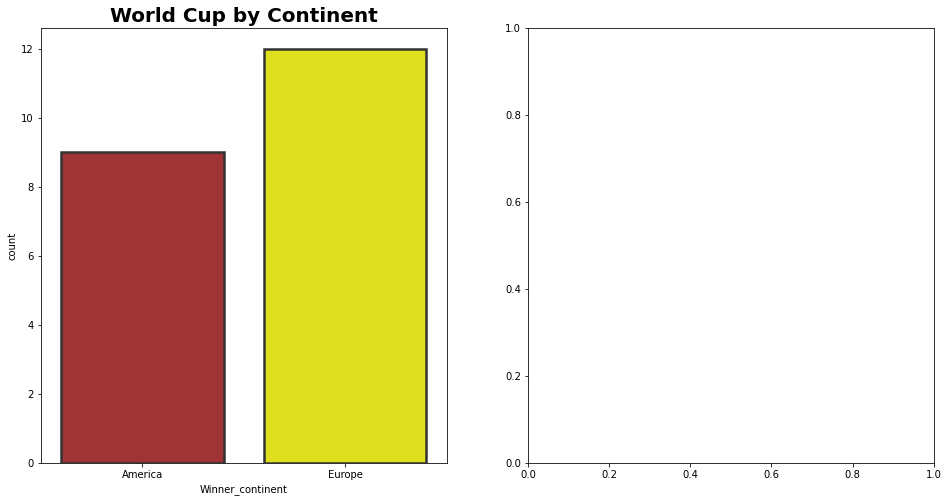

In [31]:
palette=['firebrick','yellow']

fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(16,8))


sns.countplot(ax=ax[0],x=hist_worldcup['Winner_continent'],palette=palette,linewidth=2.5, edgecolor=".2")
ax[0].set_title('World Cup by Continent',size=20,weight='bold')
ax[0].spines[['right', 'top', 'left','bottom']].set_visible(False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(labelleft=False, left=False,labelsize=14)


for i in ax[0].containers:
    ax[0].bar_label(i,fontsize=15);
    
    
    
plt.pie(value1, labels = index1, autopct='%.0f%%' ,colors=['yellow','firebrick'],wedgeprops={"edgecolor":"0",'linewidth': 2.5,
                    'antialiased': True},startangle=90,textprops={'fontsize': 20})
ax[1].set_title('World Cup winning percentage by continent',size=20,weight='bold');



<h3> As we can see, there is no Africa, Asian or Oceania Country. The World Cup has been always won by European or American countries.</h3>
<h3> But European Countries has a bit more.</h3>

![](https://editorial.uefa.com/resources/0252-0e8601efd21c-f0c6ba84591c-1000/format/wide1/1772593_w1.jpeg?imwidth=2048)

TypeError: unhashable type: 'list'

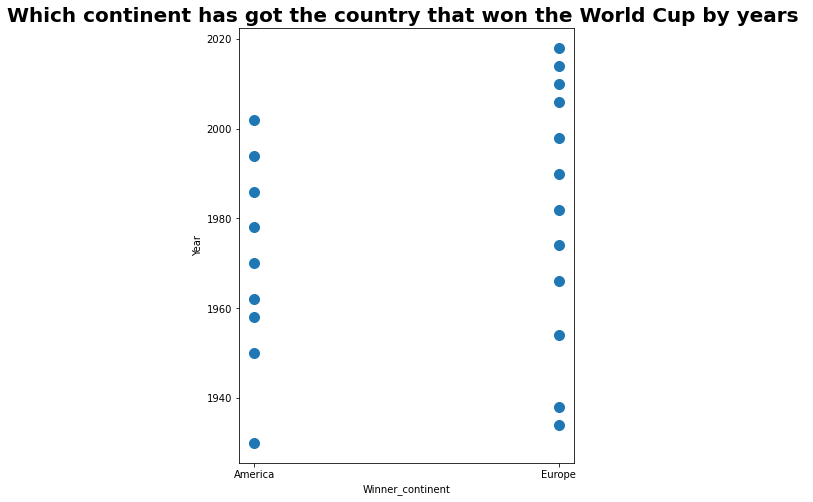

In [32]:
fig, ax= plt.subplots(figsize=(6,8))
plt.title('Which continent has got the country that won the World Cup by years ',size=20,weight='bold')
hist_worldcup.plot.scatter(x='Winner_continent',y='Year',ax=ax,zorder=2,s=100)
ax.spines[['right', 'top', 'left','bottom']].set_visible(False)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.grid(visible=True)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_yticks(hist_worldcup['Year'].tolist());


### In fact, the European's difference has become higher in the last four World Cups.


### The last Champion was France...

![](https://www.telegraph.co.uk/content/dam/world-cup/2018/07/15/TELEMMGLPICT000169509382_trans_NvBQzQNjv4BqpVlberWd9EgFPZtcLiMQfyf2A9a6I9YchsjMeADBa08.jpeg?imwidth=960)

## **Number of times in the top 4**

In [33]:
col=['Winner','Second','Third','Fourth'] #Preprocessing

countries = hist_worldcup[col].apply(pd.value_counts).reset_index().fillna(0)
countries['Total'] = countries['Winner']+countries['Second']+countries['Third']+countries['Fourth']
countries['Final'] = countries['Winner']+countries['Second']
countries


,index,Winner,Second,Third,Fourth,Total,Final
0,Argentina,2.0,3.0,0.0,0.0,5.0,5.0
1,Austria,0.0,0.0,1.0,1.0,2.0,0.0
2,Belgium,0.0,0.0,1.0,1.0,2.0,0.0
3,Brazil,5.0,2.0,2.0,2.0,11.0,7.0
4,Bulgaria,0.0,0.0,0.0,1.0,1.0,0.0
5,Chile,0.0,0.0,1.0,0.0,1.0,0.0
6,Croatia,0.0,1.0,1.0,0.0,2.0,1.0
7,Czechoslovakia,0.0,2.0,0.0,0.0,2.0,2.0
8,England,1.0,0.0,0.0,2.0,3.0,1.0
9,France,2.0,1.0,2.0,1.0,6.0,3.0


TypeError: unhashable type: 'list'

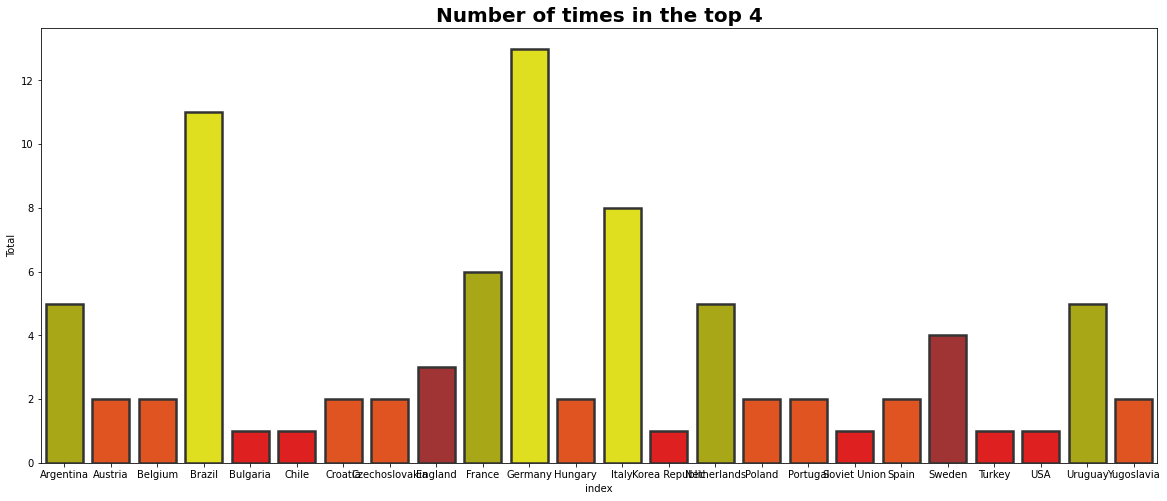

In [34]:
#Set the Palette
clrs= ['yellow' if (i>=8) else 'y' if (5<=i<8) else 'firebrick' if (3<=i<5) else 'orangered' if (i==2) else 'red' for i in countries['Total']]

fig, ax= plt.subplots(figsize=(20,8))
plt.title('Number of times in the top 4',size=20,weight='bold')
sns.barplot(data=countries,x='index',y='Total',palette=clrs,linewidth=2.5, edgecolor=".2")
ax.spines[['right', 'top', 'left','bottom']].set_visible(False)
ax.set_ylabel(None)
ax.set_xlabel(None)
plt.tick_params(labelleft=False, left=False,labelsize=14)


plt.xticks(rotation=45)

for i in ax.containers:
    ax.bar_label(i,fontsize=15);


* ### Germany is the Country that has arrived more times to the semifinal. Brazil follows, then Italy
![](https://media.gq.com.mx/photos/5be9fd19b5be864fa44b0be7/master/w_1600,c_limit/alemania_mundial_brasil_2014_5681.jpg)

## **Number of times in the final**

In [35]:
finalist = countries.drop(countries[(countries['Winner']==0) & (countries['Second']==0)].index) #Preprocessing
finalist

,index,Winner,Second,Third,Fourth,Total,Final
0,Argentina,2.0,3.0,0.0,0.0,5.0,5.0
3,Brazil,5.0,2.0,2.0,2.0,11.0,7.0
6,Croatia,0.0,1.0,1.0,0.0,2.0,1.0
7,Czechoslovakia,0.0,2.0,0.0,0.0,2.0,2.0
8,England,1.0,0.0,0.0,2.0,3.0,1.0
9,France,2.0,1.0,2.0,1.0,6.0,3.0
10,Germany,4.0,4.0,4.0,1.0,13.0,8.0
11,Hungary,0.0,2.0,0.0,0.0,2.0,2.0
12,Italy,4.0,2.0,1.0,1.0,8.0,6.0
14,Netherlands,0.0,3.0,1.0,1.0,5.0,3.0


TypeError: unhashable type: 'list'

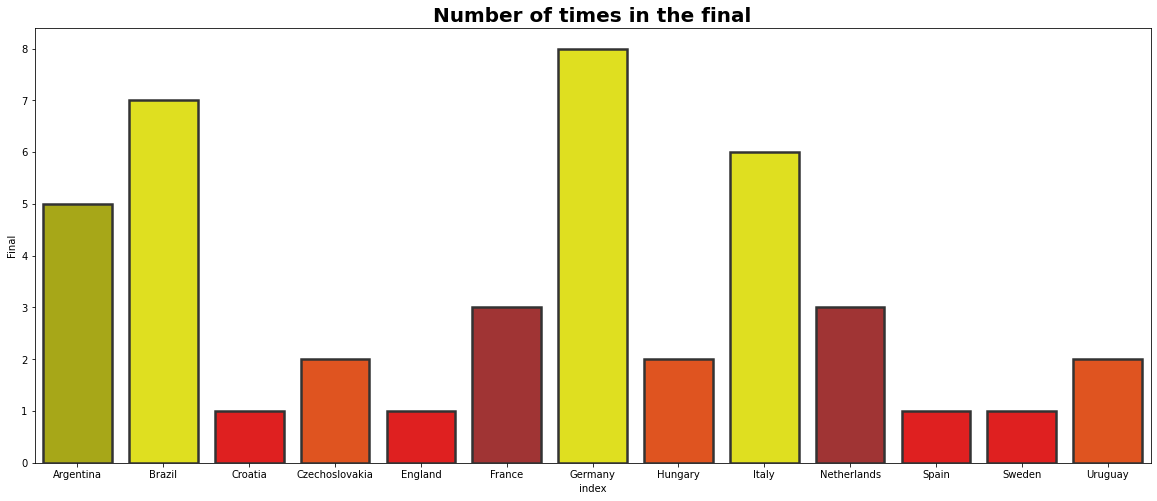

In [36]:
#Set the color
clrs= ['yellow' if (i>=6) else 'y' if (i==5) else 'firebrick' if (3<=i<5) else 'orangered' if (i==2) else 'red' for i in finalist['Final']]


fig, ax= plt.subplots(figsize=(20,8))
plt.title('Number of times in the final',size=20,weight='bold')
sns.barplot(data=finalist,x='index',y='Final',palette=clrs,linewidth=2.5, edgecolor=".2")
ax.spines[['right', 'top', 'left','bottom']].set_visible(False)
ax.set_ylabel(None)
ax.set_xlabel(None)
plt.tick_params(labelleft=False, left=False,labelsize=14)


plt.xticks(rotation=45)

for i in ax.containers:
    ax.bar_label(i,fontsize=15);

* ### The same three countries.
* ### An important thing to see is that Argentina has the same value than in the other figure. So, Argentina has never been third or fourth.
![](https://images2.minutemediacdn.com/image/upload/c_fill,w_912,h_516,f_auto,q_auto,g_auto/shape/cover/sport/fifa-world-cup-2014-brazil-argentina-v-bosnia-and-herzegovina-5ea1a6a726e40eb1dd000001.jpg)

## **Looking at the relationship between being champion and reaching the final**

In [37]:
finalist['rel_final'] = finalist['Winner']/finalist['Final'] #preprocessing
relationship= np.round(finalist[(finalist['Second']>0) | (finalist['Winner']>0)],decimals=2)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Argentina'),
  Text(1, 0, 'Brazil'),
  Text(2, 0, 'Croatia'),
  Text(3, 0, 'Czechoslovakia'),
  Text(4, 0, 'England'),
  Text(5, 0, 'France'),
  Text(6, 0, 'Germany'),
  Text(7, 0, 'Hungary'),
  Text(8, 0, 'Italy'),
  Text(9, 0, 'Netherlands'),
  Text(10, 0, 'Spain'),
  Text(11, 0, 'Sweden'),
  Text(12, 0, 'Uruguay')])

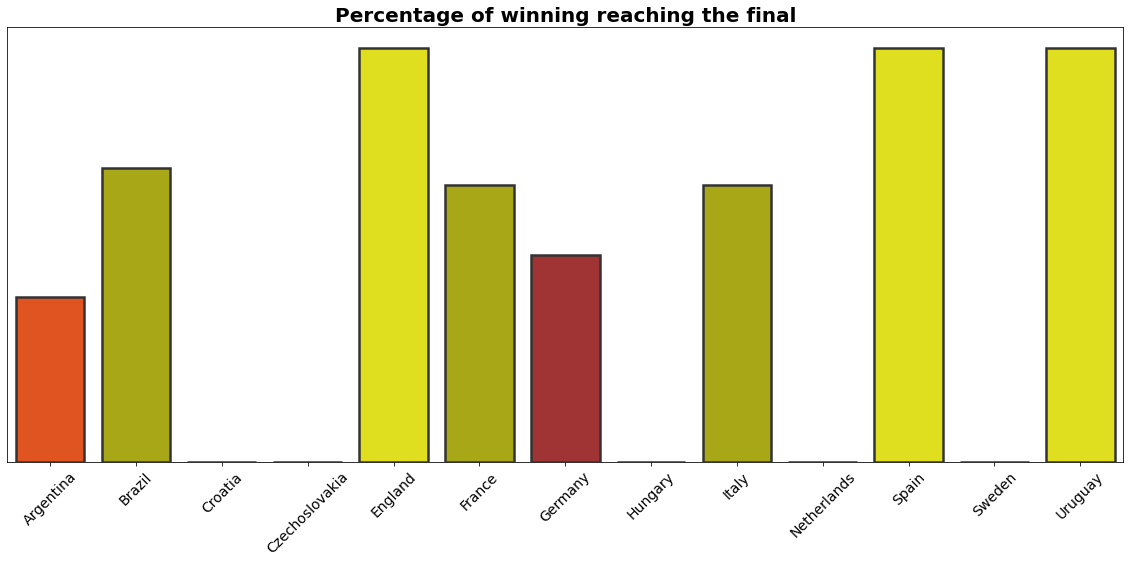

In [38]:
#Set the color
clrs= ['yellow' if (i==1) else 'y' if (0.5<i<1) else 'firebrick' if (i==0.5) else 'orangered' if (0<i<0.5) else 'red' for i in relationship['rel_final']]


fig, ax= plt.subplots(figsize=(20,8))
plt.title('Percentage of winning reaching the final',size=20,weight='bold')
sns.barplot(data=relationship,x='index',y='rel_final',palette=clrs,linewidth=2.5, edgecolor=".2")
ax.set_ylabel(None)
ax.set_xlabel(None)
plt.tick_params(labelleft=False, left=False,labelsize=14)


plt.xticks(rotation=45)

* ### 1 is the best rate between winning/reach the final, 0 is the worst. There are three countries that have always won the world cup when they reached the final: England, Spain and Uruguay. But there is only one country that have reached the final more than one time. Yes, Uruguay.
![](https://sc2.elpais.com.uy/files/article_default_content/uploads/2022/05/12/627d85a1a393b.jpeg)

* ### And if we compare with the other figure, we realize that Netherlands reached the final on three times, but they always lost.

![](https://canalshowsport.com.ar/wp-content/uploads/2020/08/1537590545_703853_1537590712_noticia_normal-768x432.jpg)

## **How many times each country reach at least the first 4 position** 

In [39]:
transpose=countries.T.rename(columns=countries.T.iloc[0]).drop(index=['index','Total']) #preprocessing transpose

transpose =transpose.reset_index()[0:4] 
transpose


,index,Argentina,Austria,Belgium,Brazil,Bulgaria,Chile,Croatia,Czechoslovakia,England,...,Netherlands,Poland,Portugal,Soviet Union,Spain,Sweden,Turkey,USA,Uruguay,Yugoslavia
0,Winner,2.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0
1,Second,3.0,0.0,0.0,2.0,0.0,0.0,1.0,2.0,0.0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Third,0.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,...,1.0,2.0,1.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0
3,Fourth,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,2.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,2.0


TypeError: unhashable type: 'list'

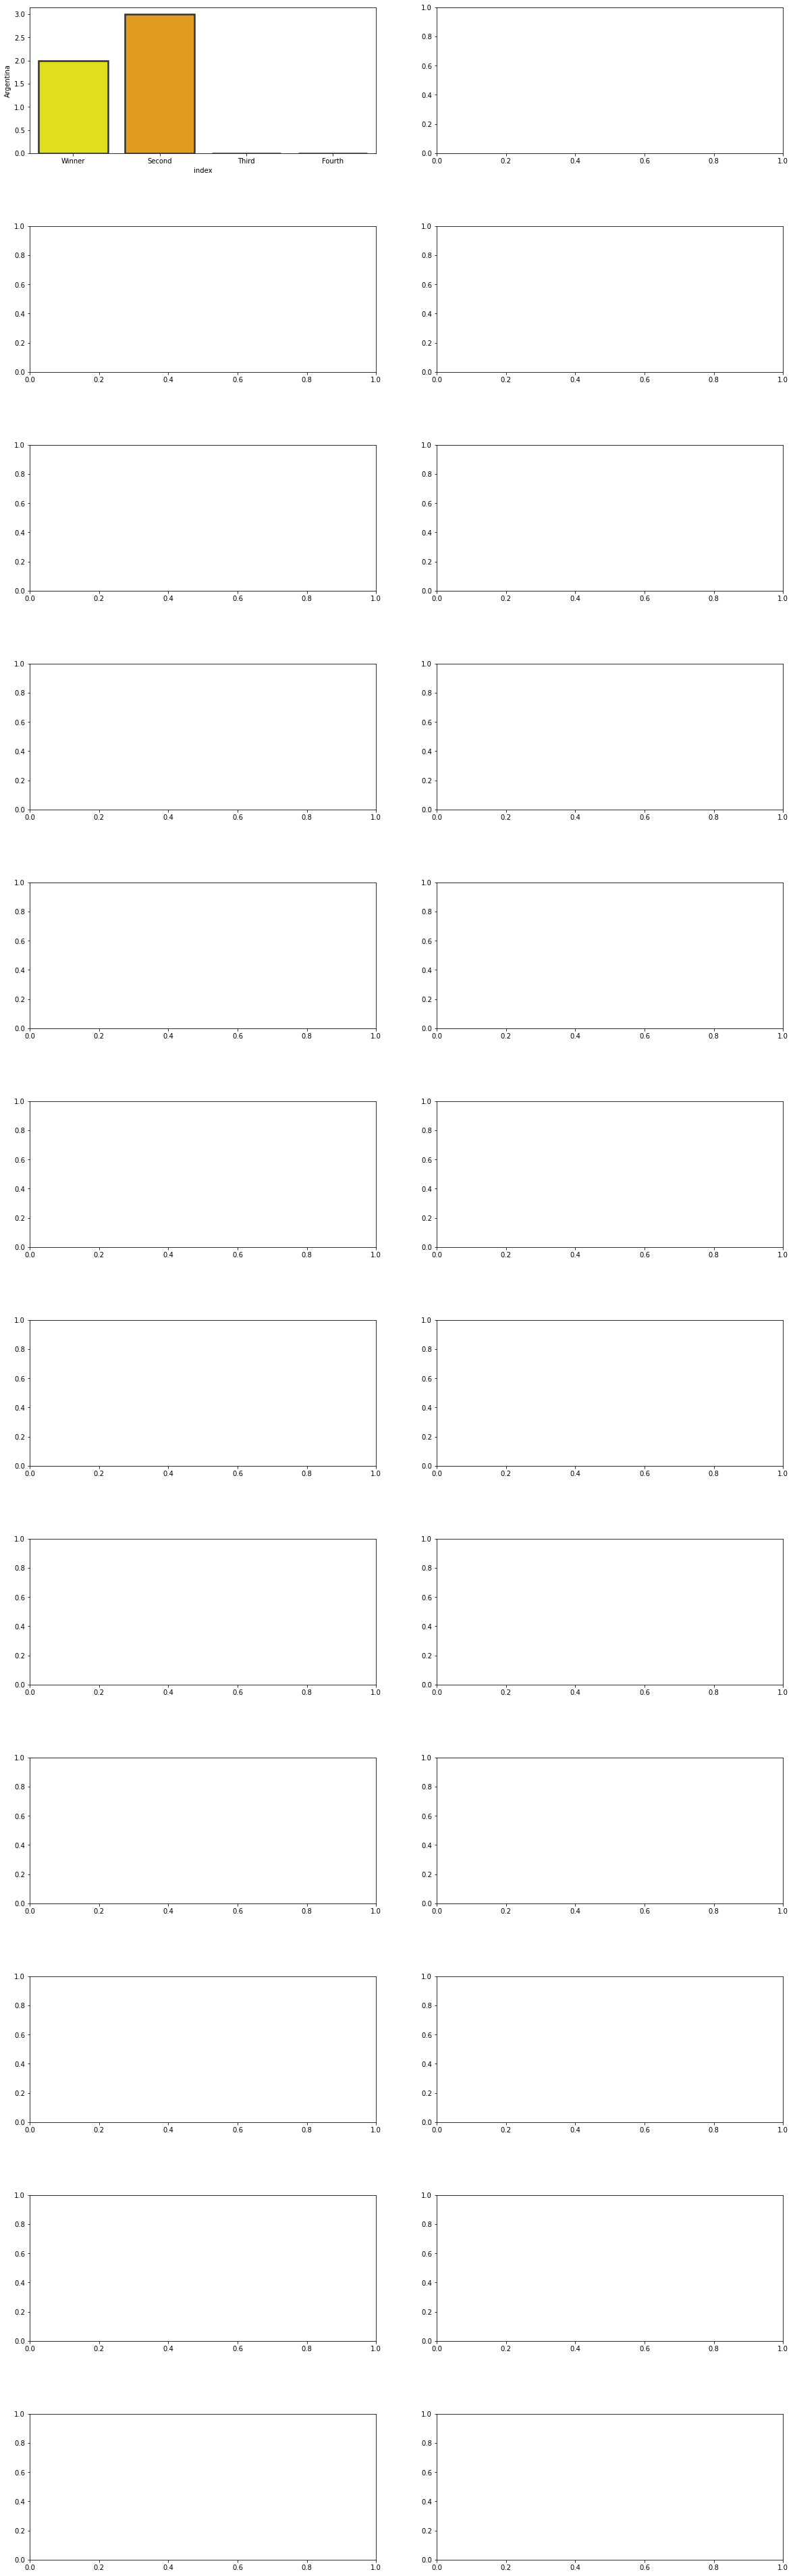

In [40]:

columns= transpose.columns[1:]
clr= ['yellow','orange','firebrick','red']
fig, axes = plt.subplots(12,2, figsize=(20,60))

fig.subplots_adjust(hspace=.5,top =1, wspace=.175)

for ax, col in zip(axes.flat,columns):
    sns.barplot(data=transpose, x='index',y=col,ax=ax,palette=clr,linewidth=2.5, edgecolor=".2")
    ax.spines[['top','left','right']].set_visible(False)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.tick_params(labelleft=False, left=False,labelsize=14)
    ax.set_title(col,fontweight="bold")
    for i in ax.containers:
        ax.bar_label(i,fontsize=15);


## **There is a believe that the host nation has got better results in the World Cup. Is it like this?**

## **The host Nation reachs the final?**

In [ ]:
index = hist_worldcup['Host_winner'].value_counts().index.tolist()
value = hist_worldcup['Host_winner'].value_counts().values.tolist()

In [ ]:
palette=['firebrick','yellow']

fig, ax= plt.subplots(nrows=1, ncols=2,figsize=(16,8))

sns.countplot(ax=ax[0], x=hist_worldcup['Host_winner'],palette=palette,linewidth=2.5, edgecolor=".2")
ax[0].set_title('Host nation finalist?',size=20,weight='bold')
ax[0].spines[['right', 'top', 'left','bottom']].set_visible(False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(labelleft=False, left=False,labelsize=14)
for i in ax[0].containers:
    ax[0].bar_label(i,fontsize=15);

    
plt.pie(value, labels = index, autopct='%.0f%%' ,colors=['firebrick','yellow'],wedgeprops={"edgecolor":"0",'linewidth': 2.5,
                    'antialiased': True},startangle=90,textprops={'fontsize': 20})
ax[1].set_title('Percentage',size=20,weight='bold');

<h3> From 21 World Cups, in 5 World cup the host nation has reached the final. The 24%. A considerable number.</h3>

## **The host nation reachs the best 4?**

In [41]:
index  = hist_worldcup['Host_best4'].value_counts().index.tolist()
values = hist_worldcup['Host_best4'].value_counts().values.tolist()

TypeError: unhashable type: 'list'

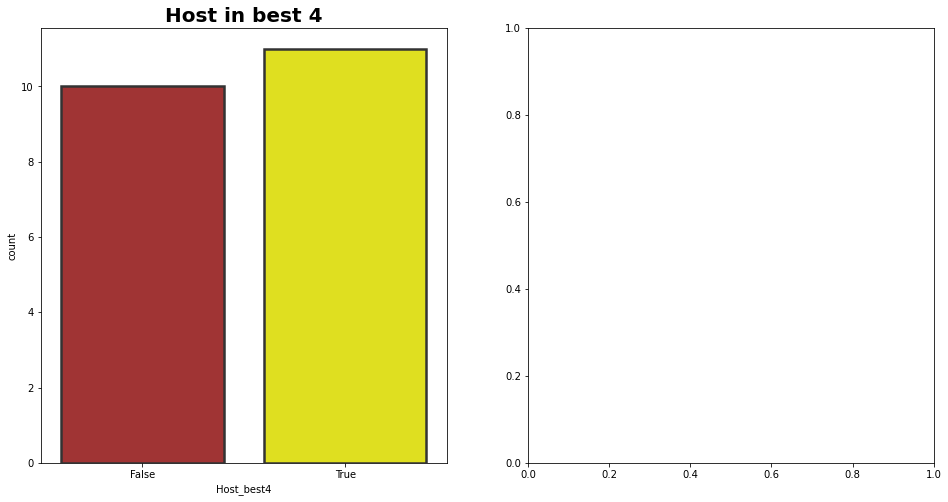

In [42]:
palette=['firebrick','yellow']

fig, ax= plt.subplots(nrows=1, ncols=2,figsize=(16,8))

sns.countplot(ax=ax[0],x=hist_worldcup['Host_best4'],palette=palette,linewidth=2.5, edgecolor=".2")
ax[0].set_title('Host in best 4',size=20,weight='bold')
ax[0].spines[['right', 'top', 'left','bottom']].set_visible(False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(labelleft=False, left=False,labelsize=14)
for i in ax[0].containers:
    ax[0].bar_label(i,fontsize=15);
    
plt.pie(values, labels = index, autopct='%.0f%%' ,colors=['yellow','firebrick'],wedgeprops={"edgecolor":"0",'linewidth': 2.5,
                    'antialiased': True},startangle=90,textprops={'fontsize': 20})
ax[1].set_title('Percentage',size=20,weight='bold');




<h3> From 21 World Cups, in 11 times the host nation has reached the semifinal. The 52%. More than a half.<h3>

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#008000;overflow:hidden;font-weight:100">3. Extra Analysis</div>

In [43]:
matches = pd.read_csv('./data2/WorldCupMatches.csv') #Looking at another DF

matches.head()


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [44]:
matches = matches.dropna(how='all') #Drop Rows with all null values

In [45]:
matches.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object')

In [46]:
matches.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,852.000000,852.000000,852.000000,850.000000,852.000000,852.000000,8.520000e+02,8.520000e+02
mean,1985.089202,1.811033,1.022300,45164.800000,0.708920,0.428404,1.066177e+07,6.134687e+07
std,22.448825,1.610255,1.087573,23485.249247,0.937414,0.691252,2.729613e+07,1.110572e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188750e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.191000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


In [47]:
matches.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object')

In [48]:
matches['Home Team Goals']= matches['Home Team Goals'].astype(int)
matches['Away Team Goals']= matches['Away Team Goals'].astype(int)

matches['result'] = matches['Home Team Goals'].astype(str)+"-"+matches['Away Team Goals'].astype(str)
matches['result']

0      4-1
1      3-0
2      2-1
3      3-1
4      1-0
      ... 
847    0-0
848    1-7
849    0-0
850    0-3
851    1-0
Name: result, Length: 852, dtype: object

## **Matches with the highest number of Attendance**

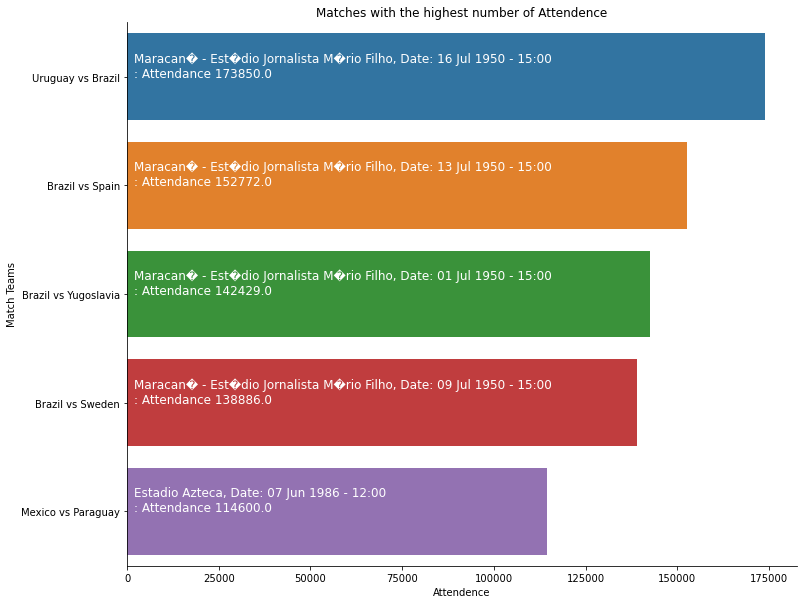

In [49]:
top5_attendance = matches.sort_values(by='Attendance',ascending=False)[:5]
top5_attendance

top5_attendance['vs'] = top5_attendance['Home Team Name'] + " vs " + top5_attendance['Away Team Name']

top5_attendance['attend']= top5_attendance['Attendance'].astype(str)

plt.figure(figsize = (12,10))

ax = sns.barplot(y = top5_attendance['vs'], x = top5_attendance['Attendance'])
sns.despine(right = True)

plt.ylabel('Match Teams')
plt.xlabel('Attendence')
plt.title('Matches with the highest number of Attendence')

for i, s in enumerate(top5_attendance['Stadium'] +", Date: " + top5_attendance['Datetime']+"\n"+": Attendance " + top5_attendance['attend']):
    ax.text(2000, i, s, fontsize = 12, color = 'white')
plt.show()

### This match between Uruguay vs Brazil in south america is knwon as "Maracanazo. Finally Uruguay beat Brazil at the end".
![](https://i.pinimg.com/564x/18/c4/a9/18c4a9e256c67d78bd034fba8140a511.jpg)


## **The Highest-Scoring matches in the World Cup**

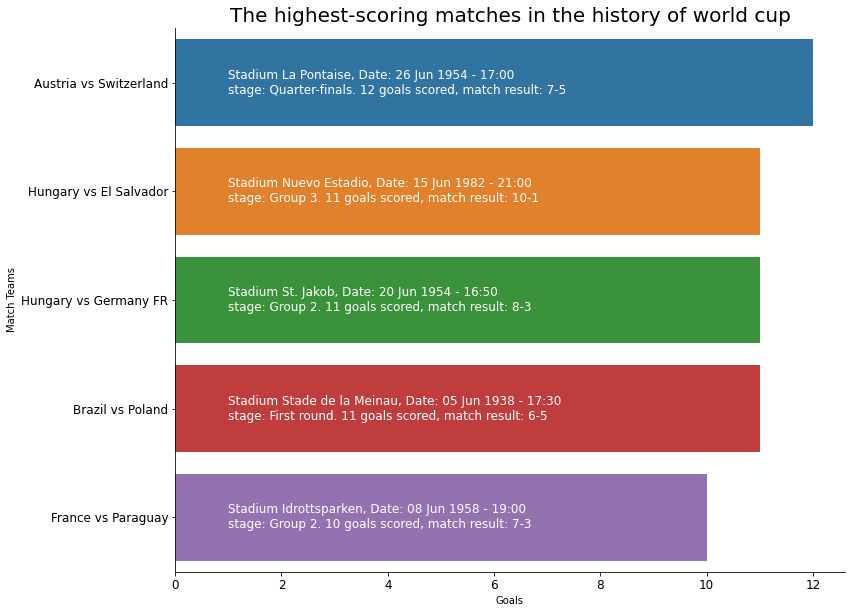

In [50]:

matches['total_goals'] = matches['Home Team Goals']+ matches['Away Team Goals']
matches['vs'] = matches['Home Team Name'] + " vs "+ matches['Away Team Name']

top5_goals=matches.sort_values(by='total_goals',ascending=False)[:5]

top5_goals['vs'] = top5_goals['Home Team Name'] + " vs " + top5_goals['Away Team Name']

top5_goals['total_goals_str']= top5_goals['total_goals'].astype(str)+ " goals scored"


top5_goals['Home Team Goals'] = top5_goals['Home Team Goals'].astype(int)
top5_goals['Away Team Goals'] = top5_goals['Away Team Goals'].astype(int)


top5_goals['result'] = top5_goals['Home Team Goals'].astype(str)+"-"+top5_goals['Away Team Goals'].astype(str)


plt.figure(figsize = (12,10))
ax = sns.barplot(y = top5_goals['vs'], x = top5_goals['total_goals'])
sns.despine(right = True)
plt.ylabel('Match Teams')
plt.xlabel('Goals')
plt.yticks(size=12)
plt.xticks(size=12)
plt.title('The highest-scoring matches in the history of world cup',size=20)
 

for i, s in enumerate("Stadium "+top5_goals['Stadium'] +", Date: " + top5_goals['Datetime']+"\n" +"stage: "+top5_goals['Stage']+". "+
                      top5_goals['total_goals_str']+ ", match result: "+top5_goals['result'] ):
    ax.text(1, i ,s,fontsize = 12, color = 'white',va = 'center')



plt.show()


## Austria vs Switzerland (7-5), 12 goals
![](https://2.bp.blogspot.com/-lCfs-k78nEo/Upl3mP0qpYI/AAAAAAAABYU/zBnKYBcwSzY/s640/su%C3%AD%C3%A7a-%C3%A1ustria-1954.jpg)

## **Highest difference of goals in a World Cup**

In [51]:
matches['difference_goals'] = pd.Series.abs(matches['Home Team Goals'] - matches['Away Team Goals']) #calculate the absolute difference with abs
top5_difference=matches.sort_values(by='difference_goals',ascending=False)[:10]
top5_difference

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,result,total_goals,vs,difference_goals
80,1954.0,17 Jun 1954 - 18:00,Group 2,Hardturm,Zurich,Hungary,9,0,Korea Republic,,...,VON GUNTER Albert (SUI),STEINER Carl (AUT),211.0,1294.0,HUN,KOR,9-0,9,Hungary vs Korea Republic,9
243,1974.0,18 Jun 1974 - 19:30,Group 2,Parkstadion,Gelsenkirchen,Yugoslavia,9,0,Zaire,,...,LLOBREGAT Vicente (VEN),BARRETO RUIZ Ramon (URU),262.0,2186.0,YUG,ZAI,9-0,9,Yugoslavia vs Zaire,9
312,1982.0,15 Jun 1982 - 21:00,Group 3,Nuevo Estadio,Elche,Hungary,10,1,El Salvador,,...,CORVER Charles (NED),LUND-SORENSEN Henning (DEN),293.0,896.0,HUN,SLV,10-1,11,Hungary vs El Salvador,9
66,1950.0,02 Jul 1950 - 15:00,Group 4,Independencia,Belo Horizonte,Uruguay,8,0,Bolivia,,...,VIANA Mario (BRA),LEMESIC Leo (YUG),208.0,1185.0,URU,BOL,8-0,8,Uruguay vs Bolivia,8
46,1938.0,12 Jun 1938 - 17:00,Quarter-finals,Fort Carree,Antibes,Sweden,8,0,Cuba,,...,WEINGARTNER Karl (AUT),SDEZ Victor (FRA),429.0,1158.0,SWE,CUB,8-0,8,Sweden vs Cuba,8
583,2002.0,01 Jun 2002 - 20:30,Group E,Sapporo Dome,Sapporo,Germany,8,0,Saudi Arabia,,...,GIACOMUZZI Miguel (PAR),RAGOONATH Michael (TRI),43950100.0,43950004.0,GER,KSA,8-0,8,Germany vs Saudi Arabia,8
88,1954.0,20 Jun 1954 - 17:00,Group 2,Charmilles,Geneva,Turkey,7,0,Korea Republic,,...,ORLANDINI Vincenzo (ITA),SCHONHOLZER Ernest (SUI),211.0,1304.0,TUR,KOR,7-0,7,Turkey vs Korea Republic,7
737,2010.0,21 Jun 2010 - 13:30,Group G,Cape Town Stadium,Cape Town,Portugal,7,0,Korea DPR,,...,BASUALTO Patricio (CHI),MONDRIA Francisco (CHI),249722.0,300061487.0,POR,PRK,7-0,7,Portugal vs Korea DPR,7
246,1974.0,19 Jun 1974 - 19:30,Group 4,Olympiastadion,Munich,Haiti,0,7,Poland,,...,BIWERSI Ferdinand (GER),ESCHWEILER Walter (GER),262.0,2085.0,HAI,POL,0-7,7,Haiti vs Poland,7
83,1954.0,19 Jun 1954 - 16:50,Group 3,St. Jakob,Basel,Uruguay,7,0,Scotland,,...,WYSSLING Paul (SUI),GUIDI Denilo (SUI),211.0,1313.0,URU,SCO,7-0,7,Uruguay vs Scotland,7


In [52]:
top5_difference['result']

80      9-0
243     9-0
312    10-1
66      8-0
46      8-0
583     8-0
88      7-0
737     7-0
246     0-7
83      7-0
Name: result, dtype: object

TypeError: savefig() takes 2 positional arguments but 3 were given

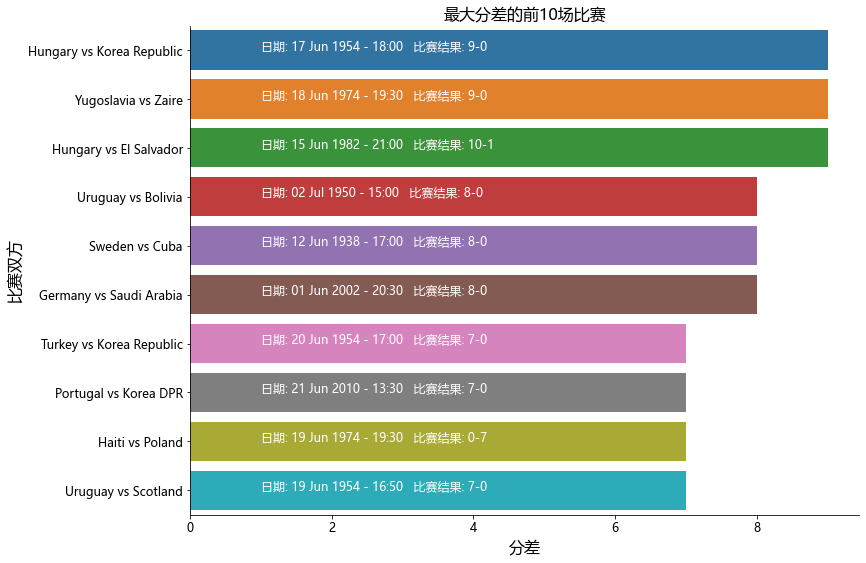

In [55]:

top5_difference['difference_goals']=top5_difference['difference_goals'].astype(int)


top5_difference['difference_goals_str']= top5_difference['difference_goals'].astype(str)+ " goals difference"




top5_difference['result'] = top5_difference['Home Team Goals'].astype(str)+"-"+top5_difference['Away Team Goals'].astype(str)

plt.rc("font", family='Microsoft YaHei')
plt.figure(figsize = (12,9))
ax = sns.barplot(y = top5_difference['vs'], x = top5_difference['difference_goals'])
sns.despine(right = True)
plt.ylabel('比赛双方',fontsize=16)
plt.xlabel('分差',fontsize=16)
plt.yticks(size=12)
plt.xticks(size=12)
plt.title('最大分差的前10场比赛',fontsize=16)
 

for i, s in enumerate("日期: " + top5_difference['Datetime']+"  比赛结果: "+top5_difference['result'] ):
    ax.text(1, i ,s,fontsize = 12, color = 'white')

plt.savefig('条形图-分差','*.jpg')
plt.show()


## **Highest Scoring countries**

In [ ]:
matches = matches.replace(['Germany FR'],'Germany') #The same as the first DF

In [17]:
list_countries =matches['Home Team Name'].unique().tolist()


NameError: name 'matches' is not defined

In [ ]:
lista_home=[]
lista_away=[]
for i in list_countries:

    goals_home = matches.loc[matches['Home Team Name'] == i, 'Home Team Goals'].sum()
    lista_home.append(goals_home)
    goals_away = matches.loc[matches['Away Team Name']== i, 'Away Team Goals'].sum()
    lista_away.append(goals_away)

In [ ]:
df = pd.DataFrame({'country': list_countries,'total_home_goals':lista_home,'total_away_goals':lista_away})
df['total_goals'] =df['total_home_goals']+df['total_away_goals']
most_goals=df.sort_values(by='total_goals',ascending=False)[:10]
most_goals

In [ ]:

fig, ax= plt.subplots(figsize=(16,8))

plt.title('Highest scoring countries in World Cup',size=16,weight='bold')
most_goals.plot(x="country", y=["total_home_goals", "total_away_goals", "total_goals"], kind="bar",ax=ax)

ax.spines[['right', 'top', 'left']].set_visible(False)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(labelleft=False, left=False,labelsize=14)
ax.legend(fontsize=20)

for i in ax.containers:
    ax.bar_label(i,fontsize=15)

fig.show();

### **Goals being the home team, away team and the total of all them. As you can see Germany, Brazil and Argentina are in the podium**

## **Total Goal Conceded of finalist teams**

In [18]:
matches['Home Team Name'].value_counts()

NameError: name 'matches' is not defined

In [ ]:
finalist

In [19]:
#Looking just the countries that have reached finals, that seem to be countries that have played more times worldcups
finalista =finalist['index'].tolist()

goalsconceded_home=[]
goalsconceded_away=[]
match1=[]
match2=[]
for i in finalista:

    goalsconc_home = matches.loc[matches['Home Team Name'] == i, 'Away Team Goals'].sum()
    goalsconceded_home.append(goalsconc_home)
    goalsconc_away = matches.loc[matches['Away Team Name']== i, 'Home Team Goals'].sum()
    goalsconceded_away.append(goalsconc_away)
    counted1 =(matches['Home Team Name']== i).sum() 
    counted2 =(matches['Away Team Name']== i).sum()
    
    match1.append(int(counted1))
    match2.append(int(counted2))

NameError: name 'finalist' is not defined

In [ ]:
#team with fewest goals conceded

df = pd.DataFrame({'country': finalista,'goalsconceded_home':goalsconceded_home,'goalsconceded_away':goalsconceded_away,
                   'matches_home':match1,'matches_away':match2})
df['total_matches'] = df['matches_home']+ df['matches_away']
df['total_goalsconceded'] =df['goalsconceded_home']+df['goalsconceded_away']
df['goalmatch_rate'] = (df['total_goalsconceded'] / df['total_matches']).round(2)
goals_conceded=df.sort_values(by='goalmatch_rate')[:10]
goals_conceded

In [ ]:
fig, ax= plt.subplots(nrows=1,ncols=2,figsize=(20,8))

plt.title('Relationship between goals conceded and matches played in World Cup',size=16,weight='bold')
goals_conceded.plot(x="country", y="total_goalsconceded", kind="bar",ax=ax[0])

ax[0].set_title('Total goals conceded by country',size=20,weight='bold')
ax[0].spines[['right', 'top', 'left']].set_visible(False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(labelleft=False, left=False,labelsize=14)

for i in ax[0].containers:
    ax[0].bar_label(i,fontsize=15)

goals_conceded.plot(x="country", y="goalmatch_rate", kind="bar",ax=ax[1])

ax[1].set_title('Total goals conceded by country',size=20,weight='bold')
ax[1].spines[['right', 'top', 'left']].set_visible(False)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].tick_params(labelleft=False, left=False,labelsize=14)

for i in ax[1].containers:
    ax[1].bar_label(i,fontsize=15)
    
    

fig.show();

### **Looking at the total of goal conceded by country we can see that the country that received more goals is Germany but when we realize that Germany has played much matches, the country that received more goals is Uruguay. And England is the country wich received less goals.**